# Sleep-Study
Data collected from a survey-based study of the sleeping habits of individuals within the US.

Here is a description of each of the variables contained within the dataset.

Enough = Do you think that you get enough sleep?

Hours = On average, how many hours of sleep do you get on a weeknight?

PhoneReach = Do you sleep with your phone within arms reach?

PhoneTime = Do you use your phone within 30 minutes of falling asleep?

Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)

Breakfast = Do you typically eat breakfast?

## Pilot Study (SleepStudyPilot.csv)
This data was collected as part of a pilot study to determine whether or not students were satisfied with the survey they created.

## Sleep Study Data (SleepStudyData.csv)
This is the data collected from the study.


[Data Source](https://www.kaggle.com/mlomuscio/sleepstudypilot?select=SleepStudyData.csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score, precision_score , classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# because here we have two files one for traning and the pther for test
# here we have just 104 rows , so we don't need to make the validation
train = pd.read_csv("../week_2/archive/SleepStudyData.csv")
test = pd.read_csv("../week_2/archive/SleepStudyPilot.csv")
train.shape

(104, 6)

In [3]:
# check for the missing , we have Hours with 2
train.isnull().sum()

Enough        0
Hours         2
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

Text(0.5, 0, 'Total Hours')

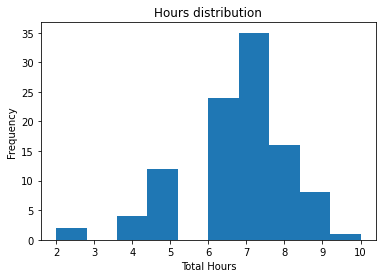

In [4]:
# see the distribution
train["Hours"].plot(kind="hist", title="Hours distribution")
plt.xlabel("Total Hours")

In [5]:
# i'll fill it with the median , it make sense to fill it with 7
train["Hours"].fillna(train["Hours"].median(), inplace=True)
# check again for the missing values 
train.isnull().sum()

Enough        0
Hours         0
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

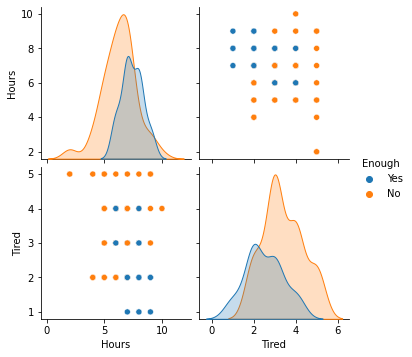

In [6]:
# we will see if the student have enough sleep or not 
# EDA
# we can see while the student sleep for more hrs , they feel they didn't get enough sleep
# students with no answer they feel tired more than students that saying yes 
sns.pairplot(train, hue="Enough")

In [7]:
# Baseline
# so, our basline is 65% with No
train["Enough"].value_counts(normalize=True)

No     0.653846
Yes    0.346154
Name: Enough, dtype: float64

In [8]:
# to scale 
train.dtypes

Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object

In [9]:
# to scale the numeric features 
numeric = [
        'Hours','Tired'
        ]

# Standard Scaler

In [10]:
#Standard Scaler
# Create scaler object
scaler = StandardScaler()

# Apply it to the train , validation and test 
X_train_scaled = scaler.fit_transform(train[numeric])
X_test_scaled = scaler.transform(test[numeric])

# Encoder

In [11]:
one_hot = OneHotEncoder()

col_names = ["PhoneReach", "PhoneTime", "Breakfast"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_test = one_hot.transform(test[col_names]).toarray()

In [12]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


columns = column_names
columns


['PhoneReach_No',
 'PhoneReach_Yes',
 'PhoneTime_No',
 'PhoneTime_Yes',
 'Breakfast_No',
 'Breakfast_Yes']

In [13]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=test.index,
    columns = column_names
)

In [14]:
oh_df

,PhoneReach_No,PhoneReach_Yes,PhoneTime_No,PhoneTime_Yes,Breakfast_No,Breakfast_Yes
0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
99,0.0,1.0,0.0,1.0,0.0,1.0
100,1.0,0.0,0.0,1.0,0.0,1.0
101,0.0,1.0,0.0,1.0,0.0,1.0
102,0.0,1.0,0.0,1.0,0.0,1.0


In [15]:
# Verify both dataframes have the same amount of columns
print(oh_df.shape)
print(oh_df_test.shape)

(104, 6)
(9, 6)


In [16]:
# Create train_new df by mergind train and one hot encoded df together 
# Reset the index after it was pulled out from pandas merge
# drop the columns used to create the one hot encoded column
train_new = train.merge(
    oh_df, # Dataframe to merge with train
    on=train.index # column to use to merge on
).set_index("key_0").drop(["PhoneReach", "PhoneTime", "Breakfast"], axis=1)

# Doing the same thing as above but to the validation data
test_new = test.merge(
    oh_df_test, on=test.index).set_index("key_0").drop(["PhoneReach", "PhoneTime", "Breakfast"]
                                                       , axis=1)

print(train_new.shape)
print(test_new.shape)

(104, 9)
(9, 9)


In [17]:
train_new

,Enough,Hours,Tired,PhoneReach_No,PhoneReach_Yes,PhoneTime_No,PhoneTime_Yes,Breakfast_No,Breakfast_Yes
key_0,,,,,,,,,
0,Yes,8.0,3,0.0,1.0,0.0,1.0,0.0,1.0
1,No,6.0,3,0.0,1.0,0.0,1.0,1.0,0.0
2,Yes,6.0,2,0.0,1.0,0.0,1.0,0.0,1.0
3,No,7.0,4,0.0,1.0,0.0,1.0,1.0,0.0
4,No,7.0,2,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
99,No,7.0,2,0.0,1.0,0.0,1.0,0.0,1.0
100,No,7.0,3,1.0,0.0,0.0,1.0,0.0,1.0
101,Yes,8.0,3,0.0,1.0,0.0,1.0,0.0,1.0


In [18]:
# # convert scaled to df
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=["Hours" , "Tired"])

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=["Hours" , "Tired"])


X_train_scaled_df

,Hours,Tired
0,0.956123,-0.076416
1,-0.474622,-0.076416
2,-0.474622,-1.069825
3,0.240750,0.916993
4,0.240750,-1.069825
...,...,...
99,0.240750,-1.069825
100,0.240750,-0.076416
101,0.956123,-0.076416
102,0.240750,-1.069825


In [19]:
# Merge train & test scaled with enocded one 
train_new_ = train_new.merge(
    X_train_scaled_df, # Dataframe to merge with train
    on=train_new.index # column to use to merge on
).set_index("key_0").drop(["Hours_x", "Tired_x"], axis=1)

test_new_ = test_new.merge(
    X_test_scaled_df,# Dataframe to merge with train
    on=test_new.index # column to use to merge on
).set_index("key_0").drop(["Hours_x", "Tired_x"], axis=1)

train_new_


,Enough,PhoneReach_No,PhoneReach_Yes,PhoneTime_No,PhoneTime_Yes,Breakfast_No,Breakfast_Yes,Hours_y,Tired_y
key_0,,,,,,,,,
0,Yes,0.0,1.0,0.0,1.0,0.0,1.0,0.956123,-0.076416
1,No,0.0,1.0,0.0,1.0,1.0,0.0,-0.474622,-0.076416
2,Yes,0.0,1.0,0.0,1.0,0.0,1.0,-0.474622,-1.069825
3,No,0.0,1.0,0.0,1.0,1.0,0.0,0.240750,0.916993
4,No,0.0,1.0,0.0,1.0,0.0,1.0,0.240750,-1.069825
...,...,...,...,...,...,...,...,...,...
99,No,0.0,1.0,0.0,1.0,0.0,1.0,0.240750,-1.069825
100,No,1.0,0.0,0.0,1.0,0.0,1.0,0.240750,-0.076416
101,Yes,0.0,1.0,0.0,1.0,0.0,1.0,0.956123,-0.076416


In [20]:
# check the shape 
print(train_new_.shape)
print(test_new_.shape)

(104, 9)
(9, 9)


In [21]:
train_new_

,Enough,PhoneReach_No,PhoneReach_Yes,PhoneTime_No,PhoneTime_Yes,Breakfast_No,Breakfast_Yes,Hours_y,Tired_y
key_0,,,,,,,,,
0,Yes,0.0,1.0,0.0,1.0,0.0,1.0,0.956123,-0.076416
1,No,0.0,1.0,0.0,1.0,1.0,0.0,-0.474622,-0.076416
2,Yes,0.0,1.0,0.0,1.0,0.0,1.0,-0.474622,-1.069825
3,No,0.0,1.0,0.0,1.0,1.0,0.0,0.240750,0.916993
4,No,0.0,1.0,0.0,1.0,0.0,1.0,0.240750,-1.069825
...,...,...,...,...,...,...,...,...,...
99,No,0.0,1.0,0.0,1.0,0.0,1.0,0.240750,-1.069825
100,No,1.0,0.0,0.0,1.0,0.0,1.0,0.240750,-0.076416
101,Yes,0.0,1.0,0.0,1.0,0.0,1.0,0.956123,-0.076416


In [22]:
#see the features to scale them 
features = [
        'Hours_y',"Breakfast_No",
        ]

target = "Enough"

# X_train = train_new_.drop(target, axis=1)
X_train = train_new_[features]
y_train = train_new_[target]

X_test = test_new_[features]
y_test = test_new_[target]

In [23]:
# Build the model
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6923076923076923

In [24]:
model.score(X_test, y_test)

0.8888888888888888

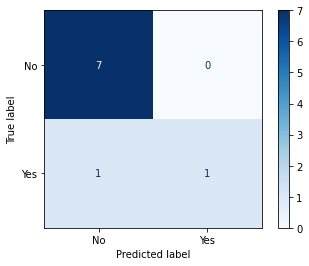

In [25]:
plot_confusion_matrix(model, X=X_test, y_true=y_test, cmap='Blues')

In [26]:
preds = model.predict(X_test)

In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93         7
         Yes       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



In [28]:
accuracy_score(y_test,preds)

0.8888888888888888

In [29]:
recall_score(np.array(y_test),preds ,pos_label="Yes")

0.5

In [30]:
precision_score(y_test, preds , pos_label="No")

0.875